In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

In [74]:
data=make_blobs(n_samples=300,centers=5,n_features=2,random_state=42)

In [76]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[0])

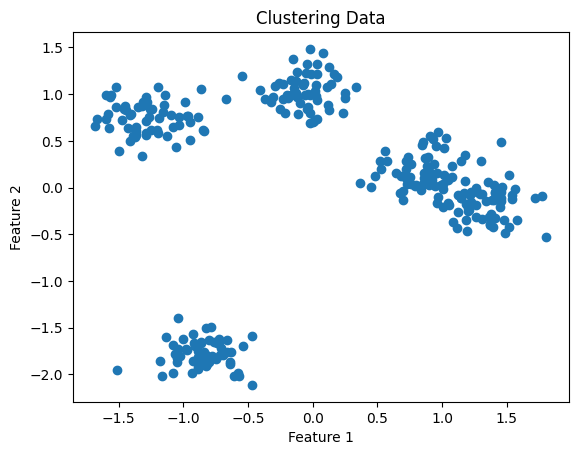

In [77]:
plt.scatter(x=data_scaled[:,0],y=data_scaled[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering Data")
plt.show()

# K Means++

In [78]:
def initialize_centeroids(data,k):
    centeroids=[]
    index=random.randint(0,len(data)-1)
    centeroids.append(data[index])
    for i in range(k-1): 
        center=np.array(centeroids)
        distances=np.sqrt(np.sum((data-center[:,np.newaxis])**2,axis=2))   
        if distances.shape[0]==1:
            index=np.argmax(distances) 
        else: 
            ind=np.argmin(distances,axis=0)  
            distance=[]
            for k in range(len(data)):
                distance.append(distances[ind[k]][k]) 
            distance=np.array(distance) 
            index=np.argmax(distance)
        centeroids.append(data[index])
    return np.array(centeroids)

def compute_distance(data,centeroids):
    return np.sqrt(np.sum((data-centeroids[:,np.newaxis])**2,axis=2))

def assign_clusters(distance):
    return np.argmin(distance,axis=0)

def update_centeroids(k,data,clusters):
    centeroids=np.zeros((k,data.shape[1]))
    for i in range(k):
        temp=data[clusters==i]
        centeroids[i]=np.mean(temp,axis=0)
    return centeroids
    
def kmeans(k,data,max_iterations=100):
    centeroids=initialize_centeroids(data,k)
    for _ in range(max_iterations):
        distance=compute_distance(data,centeroids)
        clusters=assign_clusters(distance)
        new_centeroids=update_centeroids(k,data,clusters)
        if np.all(centeroids==new_centeroids):
            return clusters,centeroids
        centeroids=new_centeroids
    return clusters,centeroids


In [71]:
clusters,centeroids=kmeans(5,data_scaled,100)

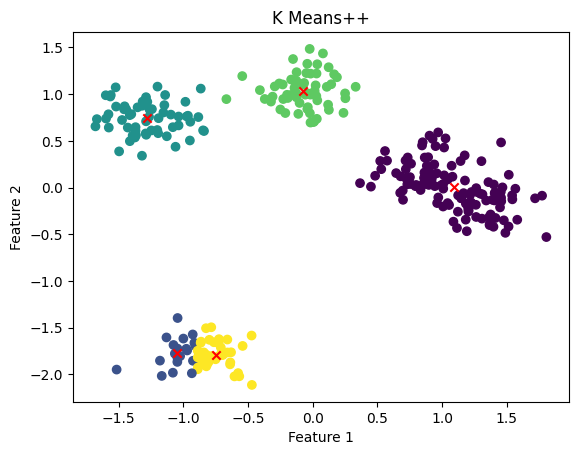

In [79]:
plt.scatter(x=data_scaled[:,0],y=data_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(x=centeroids[:,0],y=centeroids[:,1],c='red',marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K Means++')
plt.show()

# K Medoids

In [34]:
def initialize_medoids(data,k):
    index=np.random.choice(len(data),k,replace=False)
    return data[index]

def compute_disimilarity(data,centeroids):
    return np.sum(np.abs((data-centeroids[:,np.newaxis])),axis=2)

def update_medoids(k,data,clusters):
    medoids=np.zeros((k,data.shape[1]))
    for i in range(k):
        temp=data[clusters==i]
        medoids[i]=temp[np.argmin(np.sum(np.sum(np.abs((temp-temp[:,np.newaxis])),axis=2),axis=1))]
    return medoids
    
def kmedoids(k,data,max_iterations=100):
    medoids=initialize_medoids(data,k)
    for _ in range(max_iterations):
        distance=compute_disimilarity(data,medoids)
        clusters=assign_clusters(distance)
        new_medoids=update_medoids(k,data,clusters)
        if np.all(medoids==new_medoids):
            return clusters,medoids
        medoids=new_medoids
    return clusters,medoids

In [35]:
clusters,medioids=kmedoids(5,data_scaled,100)

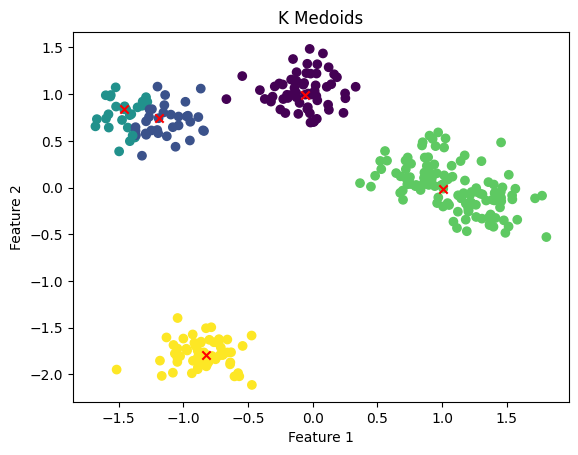

In [36]:
plt.scatter(x=data_scaled[:,0],y=data_scaled[:,1],c=clusters,cmap='viridis')
plt.scatter(x=medioids[:,0],y=medioids[:,1],c='red',marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K Medoids')
plt.show()